## 1. Importing Libraries

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn import metrics

## 2. Loading Dataset

In [2]:
df=pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21597, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


The dataset is pretty clean and does not need Data Cleaning.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## 3. Feature Engineering

First we drop the id column.

In [7]:
df.drop(['id'],axis=1, inplace=True)

Then we add the year and month columns to the dataframe.

In [8]:
df['date']=pd.to_datetime(df['date'])

In [9]:
df['year']=df['date'].apply(lambda x: x.year)
df['month']=df['date'].apply(lambda x: x.month)

In [10]:
df.drop(['date'], axis=1,inplace=True)

Now we convert the zipcode to a categorical column.

In [11]:
df['zipcode'].nunique()

70

In [12]:
le=LabelEncoder()

In [13]:
le.fit(df['zipcode'])

LabelEncoder()

In [14]:
df['zipcode']=le.transform(df['zipcode'])

We also convert the yr_renovated column to a categorical column.

In [15]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

We see that most of the houses were not renovated. So instead of this column, we add a categorical column that shows whether the house was renovated or not.

In [16]:
df['renovated']=df['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

In [17]:
df.drop(['yr_renovated'], axis=1,inplace=True)

## 4. EDA and Visualization

Here we visualize the price of the houses.

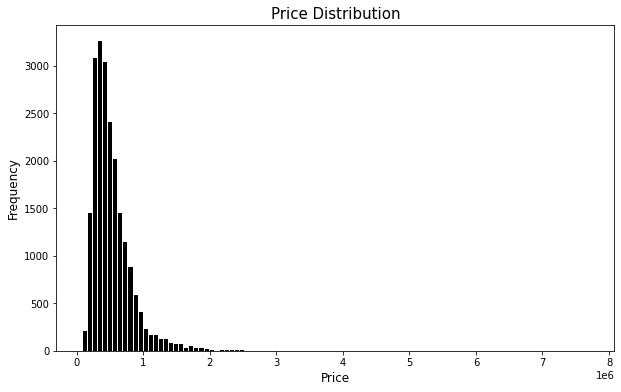

In [18]:
plt.figure(figsize=(10,6))
plt.hist(x='price', bins=100, data=df, edgecolor='w',color='black')
plt.title('Price Distribution', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

We can see that most of the houses have a price between 0 to 1.5 million dollar.

Now we want to count the Number of Bedrooms for all houses in the dataset.

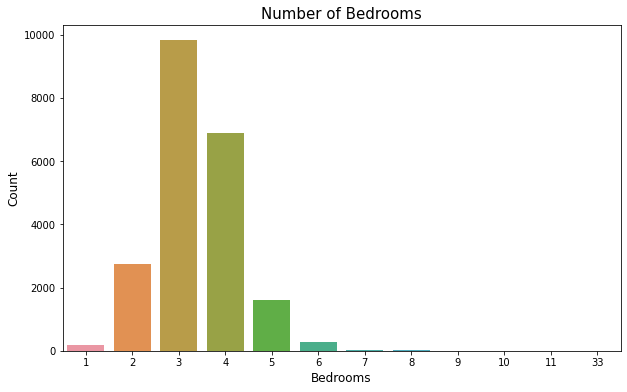

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='bedrooms',data=df)
plt.title('Number of Bedrooms', fontsize=15)
plt.xlabel('Bedrooms', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

A vast majority of these houses have 2 to 5 bedrooms.

Now we plot the correlation between price and other features.

In [20]:
cor=df.corr()['price'].sort_values(ascending=False).drop(['price', 'zipcode'])

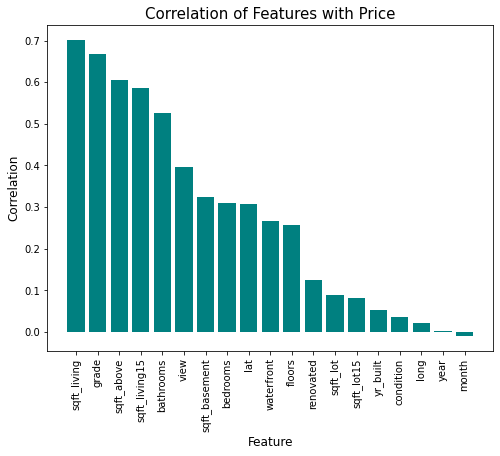

In [21]:
plt.figure(figsize=(8,6))
plt.bar(x=list(cor.index), height=list(cor.values), color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price', fontsize=15)
plt.show()

We can see that the square feet of living space has a high correlation with the price of the house.

Now we explore the scatter plots of price with features that have a high correlation with it.

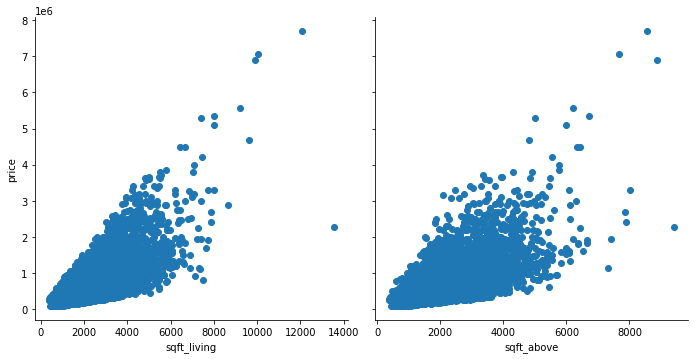

In [22]:
new=sns.PairGrid(df,x_vars=['sqft_living', 'sqft_above'], y_vars=['price'],height=5,aspect=1)
new.map(plt.scatter)
plt.show()

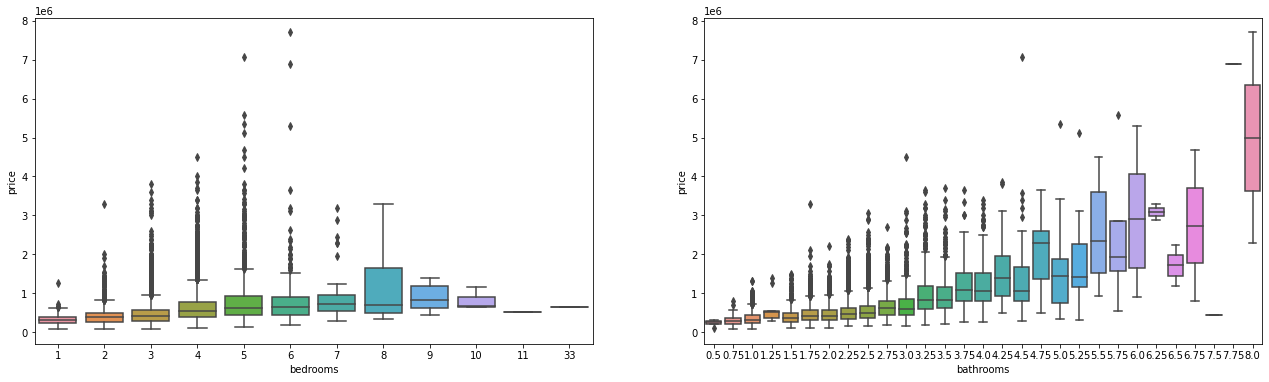

In [23]:
plt.figure(figsize=(22,6))
plt.subplot(1,2,1)
sns.boxplot(x='bedrooms', y='price', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='bathrooms', y='price', data=df)
plt.show()

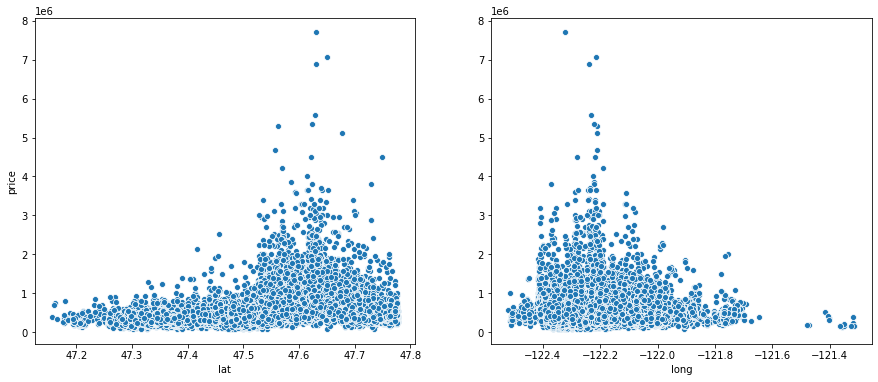

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot( x='lat',y='price', data=df)
plt.subplot(1,2,2)
sns.scatterplot( x='long',y='price', data=df)
plt.ylabel('')
plt.show()

It seems in some geographical lattitude and longitudes, the prices of houses are higher.

Now we explore the geographical properties of the houses.

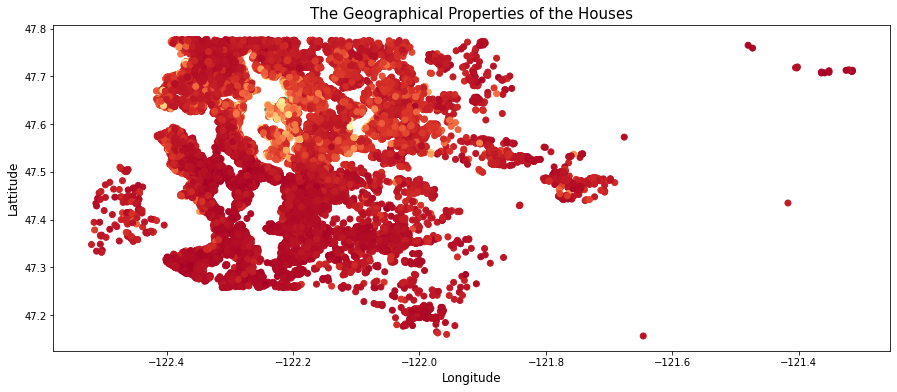

In [25]:
plt.figure(figsize=(15,6))
plt.scatter(x='long',y='lat',data=df, c='price',cmap='RdYlGn')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Lattitude', fontsize=12)
plt.title('The Geographical Properties of the Houses', fontsize=15)
plt.show()

We see the lattitude versus longitude is similar to the map of Seattle, and also the color gradient is not visible enough due to the outliers.

We will drop the top %1 of houses with high prices and create a new dataframe.`m

In [26]:
df.shape

(21597, 21)

In [27]:
21597*0.01

215.97

In [28]:
df_new=df.sort_values(by='price', ascending=False).iloc[216:]

In [29]:
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,renovated
6329,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,...,760,2003,3,47.5876,-122.204,2960,10347,2014,6,0
12271,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,...,1150,1988,25,47.5632,-122.215,3700,14486,2014,10,0
9166,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,...,1390,1960,25,47.5287,-122.220,3730,16560,2015,2,0
12565,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,...,0,1998,4,47.6422,-122.157,3900,35237,2015,4,0
1150,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,...,1560,1963,22,47.7165,-122.259,2630,13868,2015,4,0


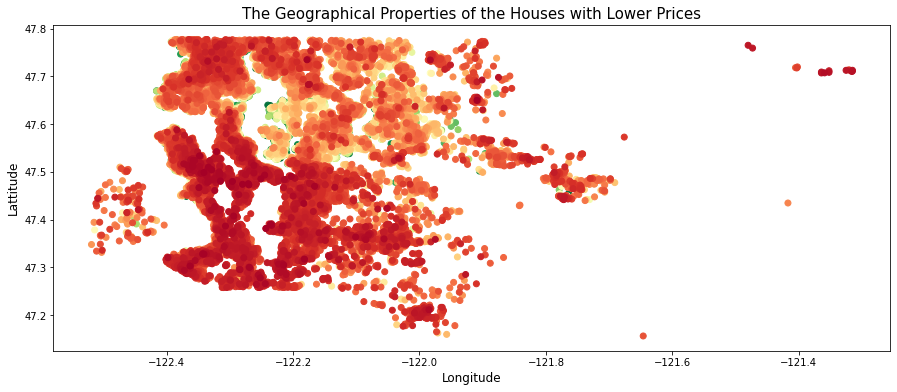

In [30]:
plt.figure(figsize=(15,6))
plt.scatter(x='long',y='lat',data=df_new, c='price',cmap='RdYlGn')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Lattitude', fontsize=12)
plt.title('The Geographical Properties of the Houses with Lower Prices', fontsize=15)
plt.show()

We can see at the edge of water, the price of houses is higher.

Here we analyze the distribution of prices versus waterfront. 

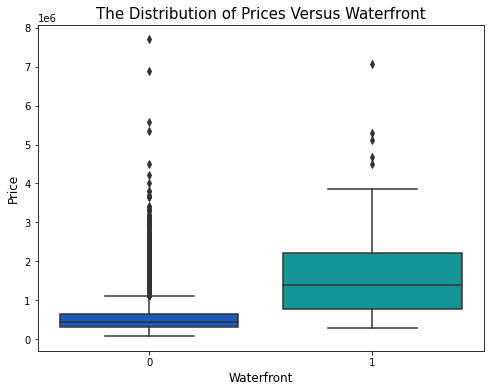

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x='waterfront', y='price',data=df, palette='winter')
plt.xlabel('Waterfront', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('The Distribution of Prices Versus Waterfront', fontsize=15)
plt.show()

We see that if the houses are located at the waterfront, their prices are higher.

Here we study the variation of price versus month and year.

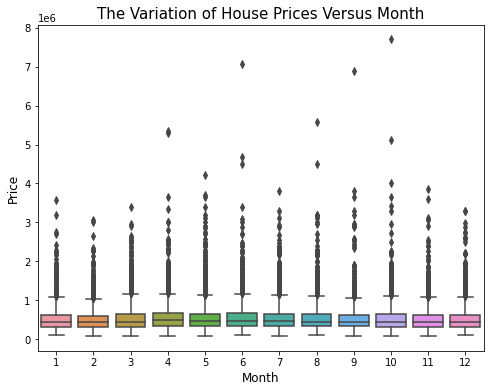

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x='month',y='price',data=df)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('The Variation of House Prices Versus Month', fontsize=15)
plt.show()

From the above plot, it is hard to interpret the data, so we study the mean prices in each month.

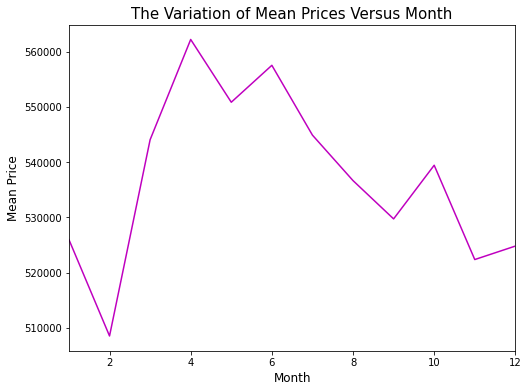

In [33]:
plt.figure(figsize=(8,6))
df.groupby('month').mean()['price'].plot(color='m')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)
plt.title('The Variation of Mean Prices Versus Month', fontsize=15)
plt.show()

According to the above figure, the mean price in the 4th month is maximum.

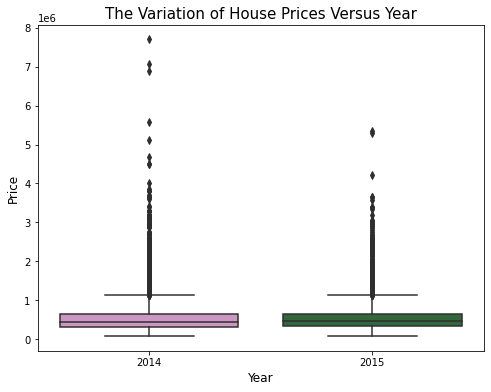

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(x='year',y='price',data=df, palette='cubehelix_r')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('The Variation of House Prices Versus Year', fontsize=15)
plt.show()

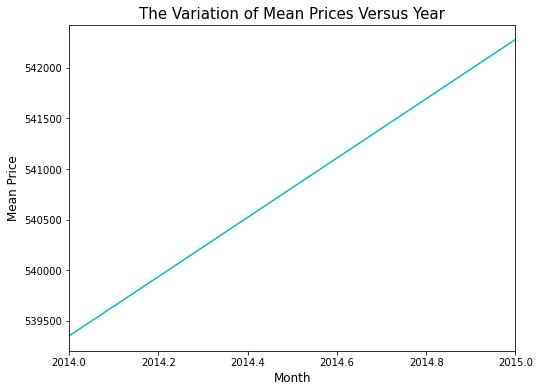

In [35]:
plt.figure(figsize=(8,6))
df.groupby('year').mean()['price'].plot(color='c')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)
plt.title('The Variation of Mean Prices Versus Year', fontsize=15)
plt.show()

It can be observed that the mean price increases between 2014 and 2015.

## 5. Predicting the House Price by TensorFlow

### 5.1. Splitting the Data

In [36]:
X=df.drop(['price'],axis=1).values
y=df['price'].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### 5.2. Scaling

In [38]:
mms=MinMaxScaler()

In [39]:
mms.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [40]:
X_train=mms.transform(X_train)

In [41]:
X_test=mms.transform(X_test)

### 5.3. Model with No Early Stopping and No Droupout Layer

#### 5.3.1. Creating the Model

In [42]:
X_test.shape

(6480, 20)

In [43]:
model=Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

#### 5.3.2. Training the Model

In [44]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), batch_size=128, epochs=400 )

Epoch 1/400
119/119 [==============================] - 1s 5ms/step - loss: 430239711232.0000 - val_loss: 418912468992.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 429067632640.0000 - val_loss: 414764171264.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 411866038272.0000 - val_loss: 375242653696.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 328648949760.0000 - val_loss: 243615662080.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 174628552704.0000 - val_loss: 111883460608.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 104530616320.0000 - val_loss: 97387044864.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 99692756992.0000 - val_loss: 95826886656.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 97978015744.0000 - val_loss: 94151229440.0000
Epoch 9/400
119/119 [

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 30555277312.0000 - val_loss: 30155802624.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 30511208448.0000 - val_loss: 30063869952.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 30494545920.0000 - val_loss: 30035152896.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 30478753792.0000 - val_loss: 29986467840.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 30442420224.0000 - val_loss: 30093066240.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 30367467520.0000 - val_loss: 29956151296.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 30334875648.0000 - val_loss: 29894879232.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 30335809536.0000 - val_loss: 29851883520.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 27784955904.0000 - val_loss: 27389997056.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 27767758848.0000 - val_loss: 27467126784.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 27761090560.0000 - val_loss: 27409348608.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 27748960256.0000 - val_loss: 27376789504.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 27747717120.0000 - val_loss: 27378409472.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 27755816960.0000 - val_loss: 27418034176.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 27708805120.0000 - val_loss: 27654682624.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 27705346048.0000 - val_loss: 27349200896.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 26317522944.0000 - val_loss: 25966477312.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 26282801152.0000 - val_loss: 25941364736.0000


#### 5.3.3. Evaluation

##### 5.3.3.1. Training Loss per Epoch

In [45]:
loss_df=pd.DataFrame(model.history.history)

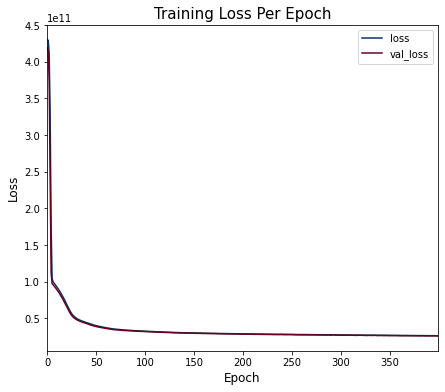

In [46]:
loss_df.plot(figsize=(7,6), colormap='RdBu_r')
plt.title('Training Loss Per Epoch', fontsize=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.show()

##### 5.3.3.2. Evaluation on  the Test Dataset

In [47]:
model.evaluate(X_test,y_test,verbose=0)

25941352448.0

##### 5.3.3.3. Evaluation on  train dataset

In [48]:
model.evaluate(X_train,y_train,verbose=0)

26342627328.0

##### 5.3.3.4. Further Evaluations (MAE, MSE, RMSE)

In [49]:
prediction=model.predict(X_test)

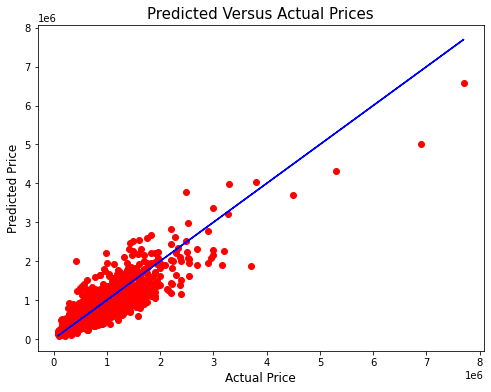

In [50]:
plt.figure(figsize=(8,6))
plt.plot(y_test,y_test, color='b')
plt.scatter(y_test,prediction,color='r')
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('Predicted Versus Actual Prices', fontsize=15)
plt.show()

In [51]:
print('MAE= ', metrics.mean_absolute_error(y_test,prediction))
print('MSE= ', metrics.mean_squared_error(y_test,prediction))
print('RMSE= ', np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R2 Score= ', metrics.r2_score(y_test,prediction))

MAE=  98930.46481481481
MSE=  25941362465.43191
RMSE=  161063.2250559758
R2 Score=  0.8043879962697937


In [52]:
df['price'].mean()

540296.5735055795

In [53]:
metrics.mean_absolute_error(y_test,prediction)/df['price'].mean()

0.18310400188720277

We see that the mean of price is about $540,000, and the mean absolute percentage error (MAPE) is 18.3%, meaning that our predicted price values are around 18.3% off the mean price values. 

### 5.4. Prediction on Brand New Data

In [54]:
new=df.drop(['price'],axis=1).iloc[0]

In [55]:
new.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        6.60000e+01,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01,  0.00000e+00])

In [56]:
X_train.shape

(15117, 20)

In [57]:
new=new.values.reshape(-1,20)

In [58]:
new

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         6.60000e+01,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01,  0.00000e+00]])

In [59]:
new=mms.transform(new)

In [60]:
model.predict(new)

array([[272722.28]], dtype=float32)

In [61]:
df['price'].iloc[0]

221900.0

The true price is 221900 dollar and the model predicted it 272722.28 dollar, which is reasonable.

## 6. Conclusion

Here we worked on house sale prices dataset and implemented deep learning to predict the house prices.

- We developed a neural network that was capable of accurately predicting the house prices and built a deep learning regression model without early stopping and dropout layers. 

- The obtained RMSE and R2 Score were 161063.2 and 0.80, respectively.